# Breast Cancer Diagnosis Using Machine Learning


## Project Topic and Goal:

**Project Topic:** This project applies unsupervised machine learning techniques to diagnose breast cancer, using patient data to classify tumors as malignant or benign through various algorithms.

**Project Goal:** To develop accurate classification models for early breast cancer detection and identify the most influential diagnostic features that can help improve clinical decision-making.

## Data

**Data Source:** The project utilizes the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle, which contains features extracted from digitized images of breast mass FNA biopsies and is publicly available for research purposes.
Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

**Data Description:**

The dataset contains 569 samples (rows) and 33 features (columns), including the target variable `diagnosis`, which indicates whether the tumor is malignant (M) or benign (B). The features are numerical values computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. Here’s a detailed description:

**Target Variable:**

* `diagnosis`: The target variable indicating the diagnosis of the breast mass. It is a categorical variable with two possible values:
    * M: Malignant (indicating the presence of cancer)
    * B: Benign (indicating non-cancerous)

**Features:**

The dataset includes 30 numeric features.

In [127]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, make_scorer
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

## Loading and Previewing Data
1. The dataset is imported into a pandas DataFrame using pd.read_csv(), creating a structured format that facilitates analysis.
2. data.head() displays the first five rows, giving an initial glimpse into the dataset's structure and contents.

In [92]:
# Load the dataset
df = pd.read_csv("breast_cancer_data.csv", index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [93]:
df.shape

(569, 32)

In [94]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

## EDA and Data Cleaning

In [96]:
df.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


In [97]:
# Missing values
missing_per_column = df.isna().sum()
print("Missing values per column:\n", missing_per_column)

# Drop all NaN column and rows with missing values
df = df.drop(columns=[c for c in df if df[c].isna().all()])
df = df.dropna()
print("After drop, shape:", df.shape)

# Duplicates
n_dup = df.duplicated().sum()
print("Number of duplicate rows:", n_dup)
df = df.drop_duplicates()
print("After dropping duplicates, shape:", df.shape)

# Encode target
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

Missing values per column:
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32

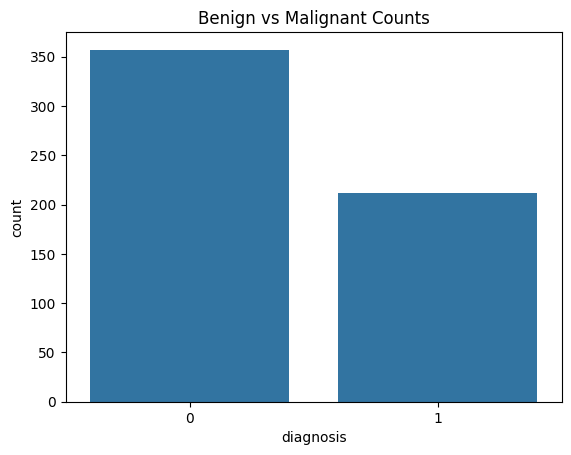

In [98]:
sns.countplot(x='diagnosis', data=df)
plt.title("Benign vs Malignant Counts")
plt.show()

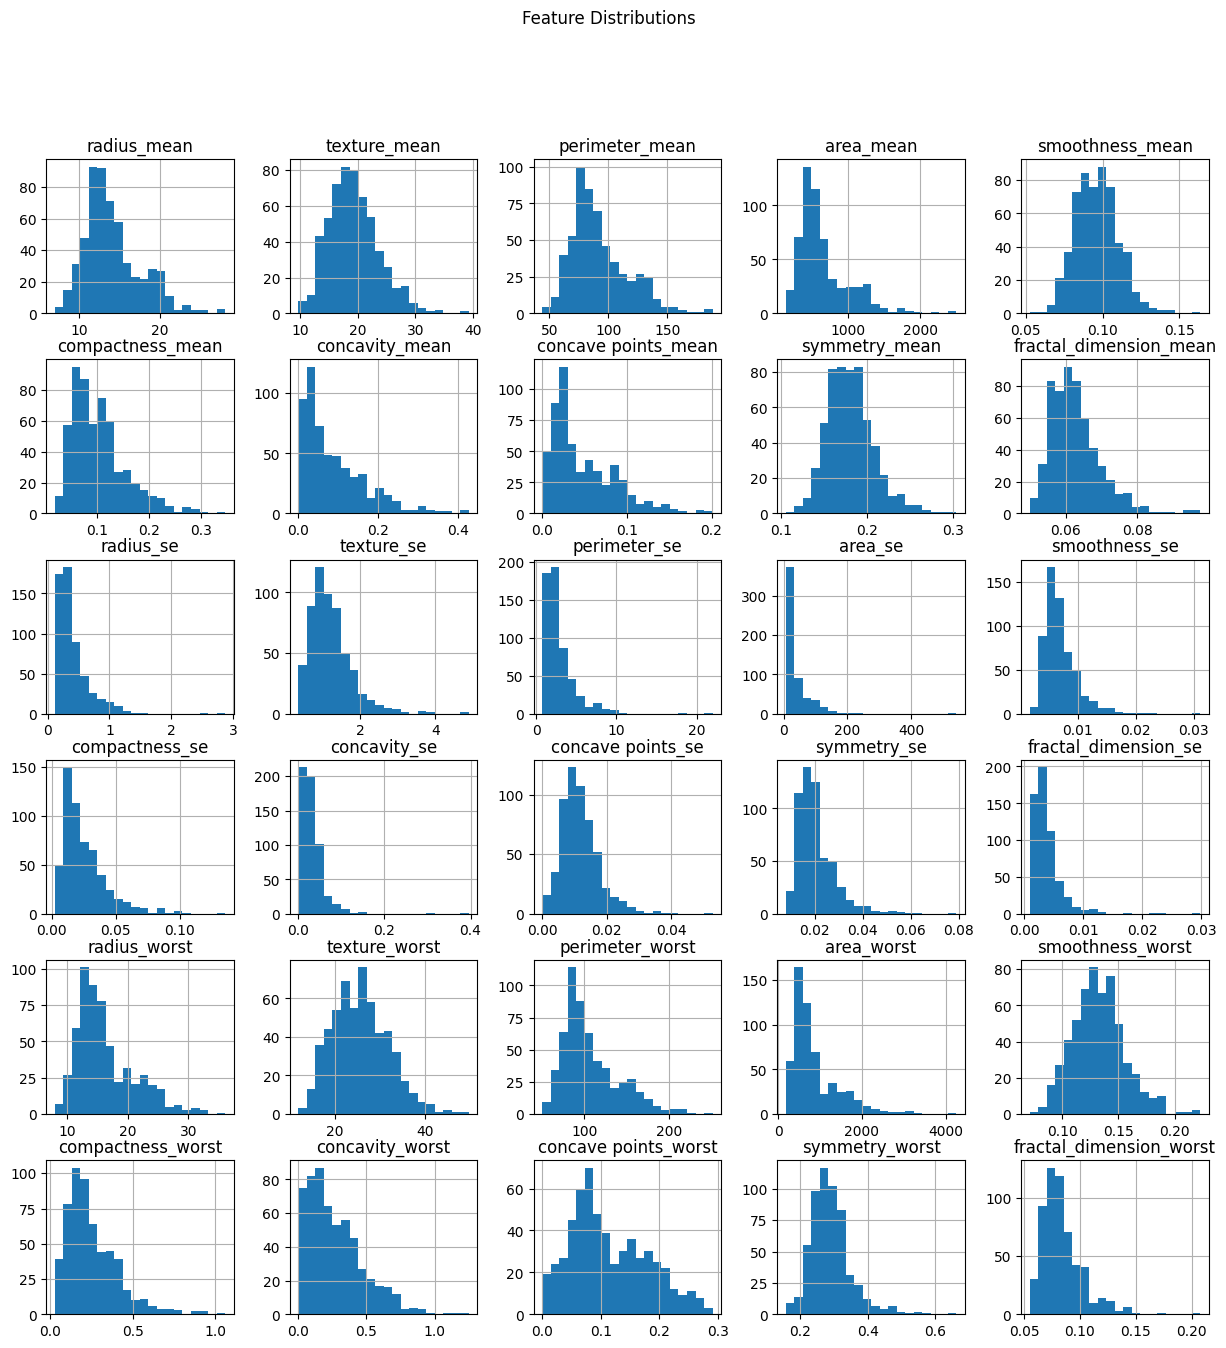

In [99]:
feature_cols = df.columns.drop('diagnosis')

df[feature_cols].hist(bins=20, figsize=(15,15))
plt.suptitle("Feature Distributions")
plt.show()

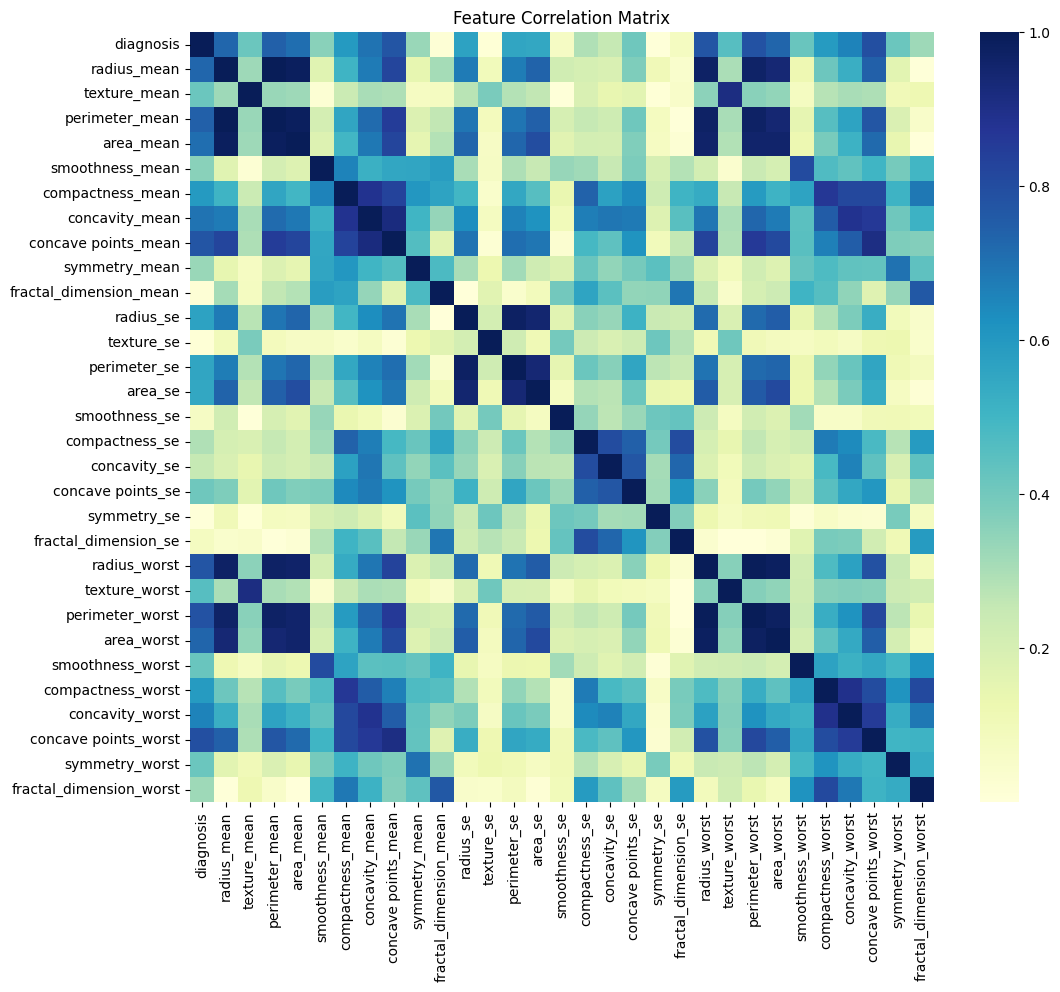

In [100]:
plt.figure(figsize=(12,10))
corr = df.corr().abs()
sns.heatmap(corr, cmap='YlGnBu', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

#### Displaying highly correlated pairs (r2 > 0.9)

In [101]:
high_corr = [(i,j,corr.loc[i,j]) for i in feature_cols for j in feature_cols 
             if i<j and corr.loc[i,j]>0.9]
print("Highly correlated pairs (>0.9):", high_corr[:5], "…")

Highly correlated pairs (>0.9): [('radius_mean', 'radius_worst', 0.9695389726112055), ('texture_mean', 'texture_worst', 0.912044588840421), ('perimeter_mean', 'radius_mean', 0.9978552814938109), ('perimeter_mean', 'radius_worst', 0.9694763634663146), ('perimeter_mean', 'perimeter_worst', 0.9703868870426394)] …


## Dimensionality Reduction

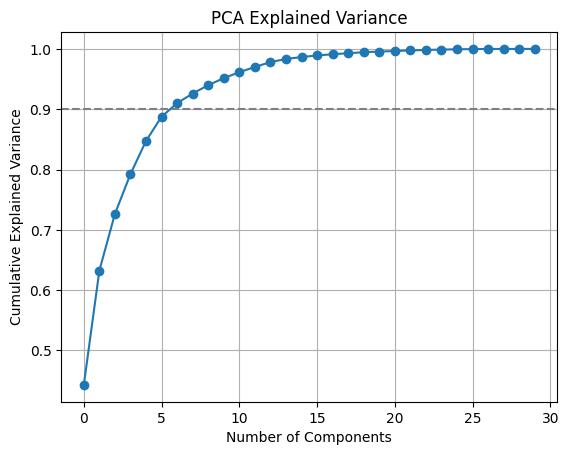

In [102]:
X = df[feature_cols].values
y = df['diagnosis'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
exp_var = pca.explained_variance_ratio_.cumsum()

plt.plot(exp_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.axhline(0.90, linestyle='--', color='gray')
plt.show()

 we can see that 10 components are responsible for 95% of the variance

## Unsupervised Learning

### K-Means: Choosing k via silhouette

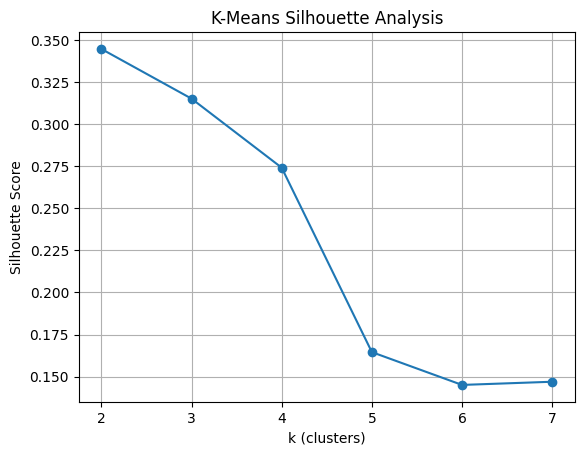

Best k by silhouette: 2


In [103]:
sil_scores = []
ks = range(2, 8)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.plot(ks, sil_scores, marker='o')
plt.xlabel("k (clusters)")
plt.ylabel("Silhouette Score")
plt.title("K-Means Silhouette Analysis")
plt.grid(True)
plt.show()

best_k = ks[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)

In [142]:
def cluster_accuracy(labels, y_true):
    acc1 = accuracy_score(y_true, labels)
    acc2 = accuracy_score(y_true, 1 - labels)
    return max(acc1, acc2)

### K-Means on PCA-Reduced Data

In [133]:
X_pca10 = PCA(n_components=10, random_state=42).fit_transform(X_scaled)
km = KMeans(n_clusters=best_k, random_state=42)
labels_km_pca = km.fit_predict(X_pca10)

print("Silhouette (PCA10 + KMeans):",
      silhouette_score(X_pca10, labels_km_pca))

acc_km_pca = cluster_accuracy(labels_km_pca, y)
print(f"K-Means on PCA10 accuracy: {acc_km_pca:.3f}")

Silhouette (PCA10 + KMeans): 0.3577446804132673
K-Means on PCA10 accuracy: 0.912


### Hierarchial Clustering

In [134]:
agg = AgglomerativeClustering(n_clusters=best_k)
labels_agg = agg.fit_predict(X_pca10)
print("Silhouette (Agglomerative):",
      silhouette_score(X_pca10, labels_agg))
acc_agg = cluster_accuracy(labels_agg, y)
print(f"Agglomerative Clustering accuracy: {acc_agg:.3f}")


Silhouette (Agglomerative): 0.29599303933760235
Agglomerative Clustering accuracy: 0.919


### Hyperparameter Tuning (K-Means)

In [135]:
def adjusted_accuracy(estimator, X, y):
    labels = estimator.fit_predict(X)
    return cluster_accuracy(labels, y)

In [136]:
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20]
}

grid = GridSearchCV(
    KMeans(random_state=42),
    param_grid=param_grid,
    scoring=adjusted_accuracy,
    cv=5
)
grid.fit(X_scaled, y)
print("Best params by accuracy:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best params by accuracy: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 20}
Best CV accuracy: 0.9174507064120478


In [143]:
best_params = grid.best_params_  

km_tuned = KMeans(**best_params, random_state=42)
labels = km_tuned.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)
print(f"Tuned K-Means silhouette: {sil:.3f}")

acc = cluster_accuracy(labels, y)
print(f"Tuned K-Means external accuracy: {acc:.3f}")

Tuned K-Means silhouette: 0.345
Tuned K-Means external accuracy: 0.910


### Logistic Regression

In [141]:
lr = LogisticRegressionCV(
    cv=5,
    penalty='l2',
    Cs=[0.01, 0.1, 1, 10],
    solver='lbfgs',
    max_iter=1000, 
    random_state=42
)
lr.fit(X_scaled, y)
lr_acc = accuracy_score(y, lr.predict(X_scaled))
print("Logistic Regression accuracy:", lr_acc)

Logistic Regression accuracy: 0.9876977152899824


## Conclusion
1. Unsupervised methods (K-Means, hierarchical) achieve silhouette scores 0.29 to 0.35 and external accuracies around 0.90–0.92.

2. Supervised logistic regression reaches 0.98 accuracy.

3. PCA reduced 30 features to 10 while retaining 95% of variance, speeding up clustering without much loss.
